<a href="https://colab.research.google.com/github/wuttikornG/data-projects/blob/main/Sigmoid_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Data Preprocessing

In [2]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df.to_csv('temp.csv',index=False)
place_set = set()
f = open('temp.csv')
fo = open('output.csv','w')
for line in f:
  if 'Omaha' in line:
    continue
  tokens=line.split(',')
  if tokens[0] == 'Hong Kong' and tokens[1] == 'China':
    outline = tokens[0]+','+tokens[0]+','+','.join(tokens[2:])
  else:
    place = tokens[0]+' '+tokens[1]
    if place not in place_set:
      place_set.add(place)
      outline = ','.join(tokens)
    else:
      outline = tokens[0]+'_'+','.join(tokens[1:])
  fo.write(outline)
fo.close()
f.close()

changed_names = {
    "Holy See": "Vatican City",
    "Hong Kong SAR": "Hong Kong",
    "Iran (Islamic Republic of)": "Iran",
    "Macao SAR": "Macau",
    "Republic of Korea": "South Korea",
    "Republic of Moldova": "Moldova",
    "Russian Federation": "Russia",
    "Saint Martin": "St. Martin",
    "Taipei and environs": "Taiwan",
    "Viet Nam": "Vietnam",
    "occupied Palestinian territory": "Palestine",
    "Korea, South":"South Korea",
    "Mainland China":"China",
    "United Kingdom":"UK",
    "Taiwan*":"Taiwan",
    "Others":"Cruise Ship"}
df=df.replace(changed_names)
df = df.groupby('Country/Region').sum()
df['Place'] = df.index
df['Place'] = df['Place'].str.strip()
selected_columns = ['Place']+list(df.columns[2:-1])
time_series_df = df[selected_columns].T
time_series_df=time_series_df[1:]
time_series_df.columns = df['Place']
time_series_df.index.set_names('Date',inplace=True)
filtered_columns = []
for col in time_series_df.columns:
  print(col)
  if time_series_df[col].max() > 10:
    filtered_columns.append(col)
time_series_df = time_series_df[filtered_columns]

<ipython-input-2-70b4503af344>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Country/Region').sum()


Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, North
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldiv

# Getting Data

In [54]:
Y=list(time_series_df['UK'])
X=[i for i in range(len(Y))]

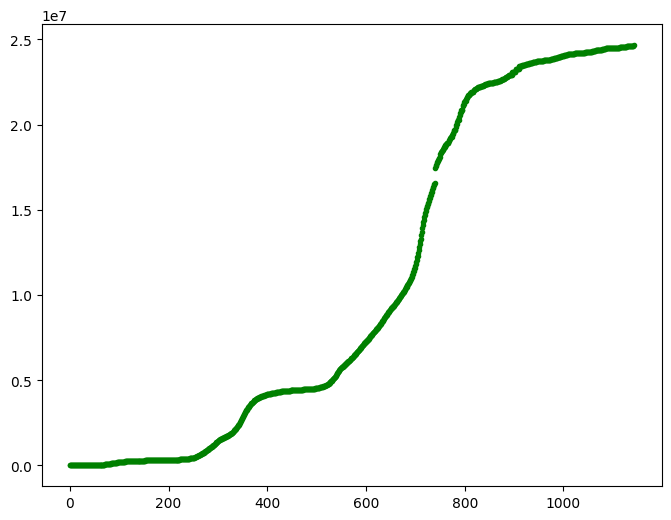

In [71]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(X,Y,'g.')
plt.show()

# Sigmoid

$$f(X) = \frac{h}{1 + \exp(-l \cdot (X - m))}$$

\
h: In a standard sigmoid function, this is usually 1, but it can be adjusted to scale the output.

m: This is the x-value of the sigmoid’s midpoint. In a standard sigmoid function, this is usually 0.

l: This is the steepness of the function. In a standard sigmoid function, this is usually 1.

X: This is the input to the function. It’s the variable that you’re applying the sigmoid function to.

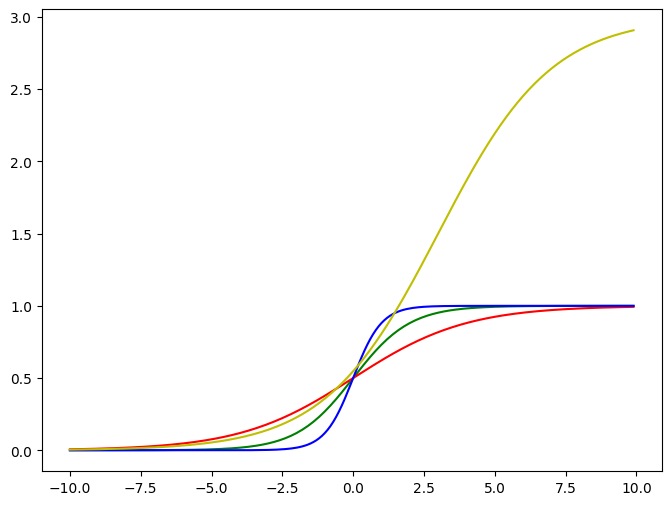

In [53]:
import numpy as np

X=np.arange(-10,10,0.1)
Y1=1/(1+np.exp(-X))
Y2=1/(1+np.exp(-0.5*X))
Y3=1/(1+np.exp(-2*X))

m=3
h=3
Y4=h/(1+np.exp(-0.5*(X-m)))

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(X,Y1,'g')
plt.plot(X,Y2,'r')
plt.plot(X,Y3,'b')
plt.plot(X,Y4,'y')
plt.show()

In [69]:
# Define s-curve function
def s_curve(X,h,m,l):
  return h/(1+np.exp(-l*(X-m)))

In [64]:
# Curve fitting with s-curve
from scipy.optimize import curve_fit

Y=list(time_series_df['UK'])
X=[i for i in range(len(Y))]
X=np.array(X)
Y=np.array(Y)
t,c=curve_fit(s_curve,X,Y,bounds=([23000000,600,0],[280000000,800,3]))
print(t)

[2.57611401e+07 6.81285098e+02 9.06526232e-03]


<ipython-input-56-122458e258aa>:2: RuntimeWarning: overflow encountered in exp
  return h/(1+np.exp(-l*(X-m)))


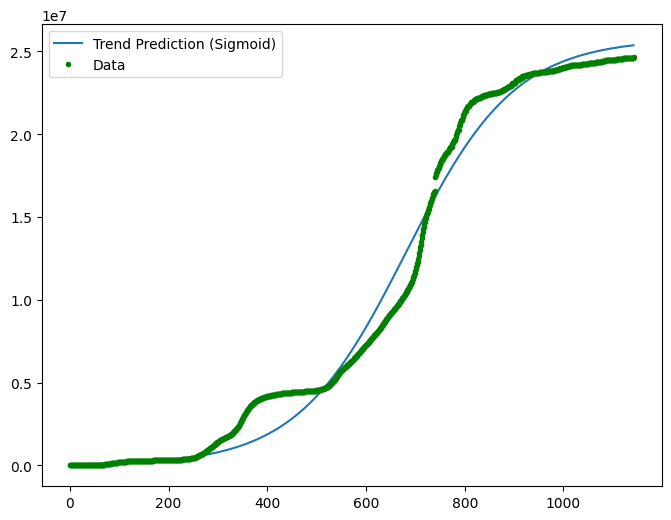

In [75]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(X,s_curve(X,t[0],t[1],t[2]), label='Trend Prediction (Sigmoid)')
plt.plot(X,Y,'g.', label='Data')
ax.legend(loc='upper left')
plt.show()